# **1. Perkenalan Dataset**


# Dataset Fruit and Vegetable Image Recognition

## Deskripsi Dataset

Dataset ini berisi koleksi gambar berbagai buah dan sayuran yang dirancang khusus untuk tugas-tugas pengenalan gambar (image recognition). Dataset ini menyediakan variasi yang cukup luas dengan total **36 kategori** makanan yang terdiri dari 10 jenis buah dan 26 jenis sayuran.

### Kategori Buah-buahan:
- Banana (Pisang)
- Apple (Apel)
- Pear (Pir)
- Grapes (Anggur)
- Orange (Jeruk)
- Kiwi
- Watermelon (Semangka)
- Pomegranate (Delima)
- Pineapple (Nanas)
- Mango (Mangga)

### Kategori Sayuran:
- Cucumber (Mentimun)
- Carrot (Wortel)
- Capsicum (Paprika)
- Onion (Bawang Bombay)
- Potato (Kentang)
- Lemon (Jeruk Nipis)
- Tomato (Tomat)
- Radish (Lobak)
- Beetroot (Bit)
- Cabbage (Kubis)
- Lettuce (Selada)
- Spinach (Bayam)
- Soybean (Kedelai)
- Cauliflower (Kembang Kol)
- Bell Pepper (Paprika Manis)
- Chilli Pepper (Cabai)
- Turnip (Lobak Putih)
- Corn (Jagung)
- Sweetcorn (Jagung Manis)
- Sweet Potato (Ubi Jalar)
- Paprika
- Jalapeño
- Ginger (Jahe)
- Garlic (Bawang Putih)
- Peas (Kacang Polong)
- Eggplant (Terong)

## Struktur Dataset

Dataset ini terorganisir dengan baik dalam tiga folder utama:

1. **Train (Training Data)**: 100 gambar per kategori
2. **Test (Testing Data)**: 10 gambar per kategori  
3. **Validation (Validation Data)**: 10 gambar per kategori

**Total Gambar**: 120 gambar × 36 kategori = **4,320 gambar**

Setiap folder dibagi lagi menjadi subfolder berdasarkan jenis buah atau sayuran, sehingga memudahkan dalam proses loading dan preprocessing data.

## Tujuan dan Aplikasi Dataset

Dataset ini sangat cocok untuk berbagai aplikasi machine learning dan computer vision, seperti:

- **Image Classification**: Mengklasifikasikan jenis buah dan sayuran
- **Food Recognition Apps**: Aplikasi pengenalan makanan dari foto
- **Educational Projects**: Proyek pembelajaran untuk memahami konsep deep learning
- **Research**: Penelitian dalam bidang computer vision dan food recognition

## Sumber dan Disclaimer

Gambar-gambar dalam dataset ini dikumpulkan menggunakan Bing Image Search. Pengguna dataset bertanggung jawab untuk memastikan penggunaan sesuai dengan hukum hak cipta yang berlaku. Disarankan untuk menggunakan dataset ini hanya untuk tujuan pendidikan dan non-komersial.

## Sitasi

```
Kritik Seth, "Fruits and Vegetables Image Recognition Dataset," Kaggle 2020
[https://www.kaggle.com/kritikseth/fruit-and-vegetable-image-recognition]
```

---


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [11]:
# IMPORT LIBRARIES
# Jalankan cell ini terlebih dahulu untuk mengimport semua library yang diperlukan

import kagglehub
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import cv2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

print("🚀 LIBRARY BERHASIL DIIMPORT")
print("="*60)


🚀 LIBRARY BERHASIL DIIMPORT


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [12]:
# LOAD DATASET
# Jalankan cell ini untuk memuat dataset dari path yang telah ditentukan

# DOWNLOAD DAN LOAD DATASET
def download_kaggle_dataset(dataset_id="kritikseth/fruit-and-vegetable-image-recognition"):
    """Download dataset from Kaggle"""
    print("🚀 MULAI DOWNLOAD DATASET")
    print("="*60)
    print(f"📦 Dataset ID: {dataset_id}")
    print("⏳ Mendownload dataset dari Kaggle...")

    try:
        path = kagglehub.dataset_download(dataset_id)
        print(f"✅ Dataset berhasil didownload!")
        print(f"📁 Lokasi: {path}")
        return path
    except Exception as e:
        print(f"❌ Error saat download dataset: {e}")
        return None

def load_dataset_info(dataset_path):
    """Load dan analisis struktur dataset"""
    if not dataset_path or not os.path.exists(dataset_path):
        print("❌ Path dataset tidak valid!")
        return None, None, None

    print(f"\n🔎 LOAD STRUKTUR DATASET")
    print("="*60)

    # Cari folder train, test, validation
    splits = {}
    for split_name in ['train', 'test', 'validation']:
        split_path = os.path.join(dataset_path, split_name)
        if os.path.exists(split_path):
            splits[split_name] = split_path

    # Ambil kategori dari folder train
    categories = []
    if 'train' in splits:
        categories = [f for f in os.listdir(splits['train'])
                     if os.path.isdir(os.path.join(splits['train'], f))]
        categories.sort()

    return dataset_path, splits, categories

# Download dan load dataset
dataset_path = download_kaggle_dataset()
main_path, splits, categories = load_dataset_info(dataset_path)

print(f"\n✅ DATASET BERHASIL DILOAD")
print(f"📂 Jumlah Kategori: {len(categories)}")
print(f"📁 Split Available: {list(splits.keys())}")

🚀 MULAI DOWNLOAD DATASET
📦 Dataset ID: kritikseth/fruit-and-vegetable-image-recognition
⏳ Mendownload dataset dari Kaggle...


100%|██████████| 1.98G/1.98G [00:18<00:00, 117MB/s]

Extracting files...


✅ Dataset berhasil didownload!
📁 Lokasi: /root/.cache/kagglehub/datasets/kritikseth/fruit-and-vegetable-image-recognition/versions/8

🔎 LOAD STRUKTUR DATASET

✅ DATASET BERHASIL DILOAD
📂 Jumlah Kategori: 36
📁 Split Available: ['train', 'test', 'validation']


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.


📊 ANALISIS DISTRIBUSI DATASET
📁 TRAIN       :  3115 gambar
📁 TEST        :   359 gambar
📁 VALIDATION  :   351 gambar
🎯 TOTAL GAMBAR   :  3825 gambar
🏷️  TOTAL KATEGORI :    36 kategori

📋 TABEL RINGKASAN DATA
No  Kategori        Train    Test     Valid    Total    Harga (Rp/kg)   Kalori/100g  Tipe      
------------------------------------------------------------------------------------------------------------------------
1   apple           68       10       10       88       25,000          52           fruit     
2   banana          75       9        9        93       15,000          89           fruit     
3   beetroot        88       10       10       108      15,000          43           vegetable 
4   bell pepper     90       10       9        109      25,000          31           vegetable 
5   cabbage         92       10       10       112      8,000           25           vegetable 
6   capsicum        89       10       10       109      22,000          31           vegetabl

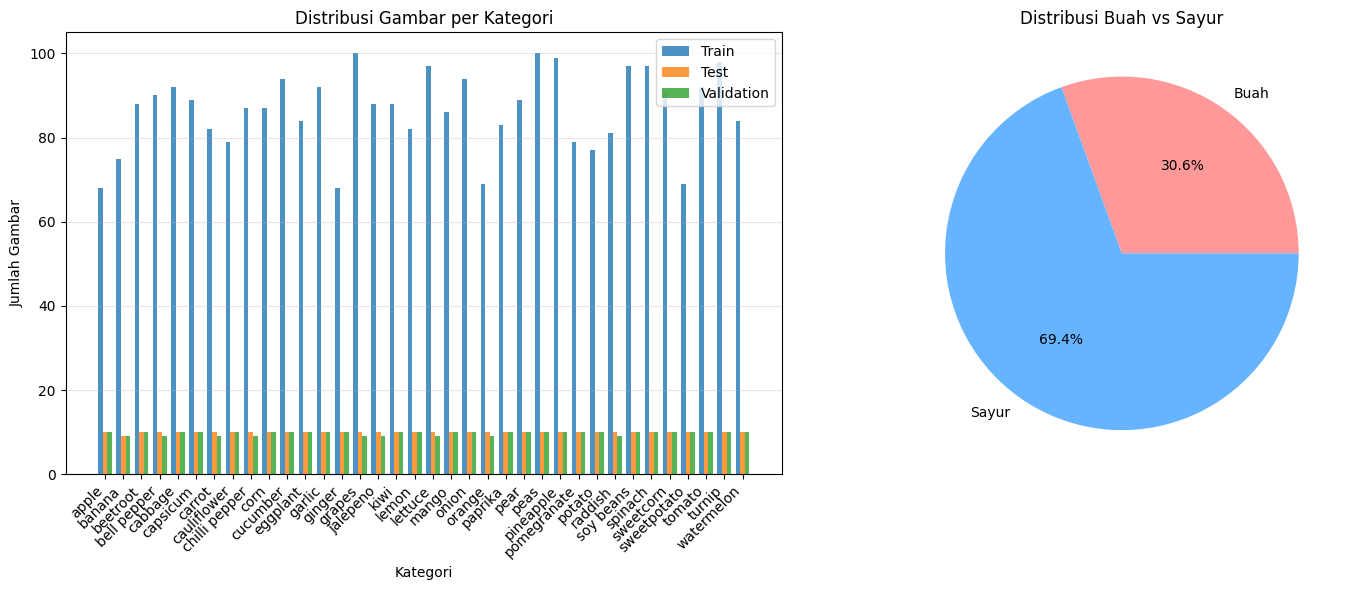

📊 STATISTIK DISTRIBUSI:
   Train     :  3115 gambar (81.4%)
   Test      :   359 gambar (9.4%)
   Validation:   351 gambar (9.2%)
   Total     :  3825 gambar
   Buah      :    11 kategori
   Sayur     :    25 kategori

✅ EDA SELESAI - SIAP UNTUK PREPROCESSING


In [14]:
# EXPLORATORY DATA ANALYSIS (EDA)
# Jalankan cell ini

def create_price_calorie_mapping():
    """Membuat mapping harga dan kalori untuk setiap buah dan sayur"""
    # Data harga dalam Rupiah per kg dan kalori per 100g
    price_calorie_map = {
        # BUAH-BUAHAN
        'apple': {'price': 25000, 'calories': 52, 'type': 'fruit'},
        'banana': {'price': 15000, 'calories': 89, 'type': 'fruit'},
        'grapes': {'price': 45000, 'calories': 62, 'type': 'fruit'},
        'kiwi': {'price': 35000, 'calories': 61, 'type': 'fruit'},
        'lemon': {'price': 20000, 'calories': 29, 'type': 'fruit'},
        'mango': {'price': 18000, 'calories': 60, 'type': 'fruit'},
        'orange': {'price': 22000, 'calories': 47, 'type': 'fruit'},
        'pear': {'price': 28000, 'calories': 57, 'type': 'fruit'},
        'pineapple': {'price': 12000, 'calories': 50, 'type': 'fruit'},
        'pomegranate': {'price': 40000, 'calories': 83, 'type': 'fruit'},
        'watermelon': {'price': 8000, 'calories': 30, 'type': 'fruit'},

        # SAYURAN
        'beetroot': {'price': 15000, 'calories': 43, 'type': 'vegetable'},
        'bell pepper': {'price': 25000, 'calories': 31, 'type': 'vegetable'},
        'cabbage': {'price': 8000, 'calories': 25, 'type': 'vegetable'},
        'capsicum': {'price': 22000, 'calories': 31, 'type': 'vegetable'},
        'carrot': {'price': 12000, 'calories': 41, 'type': 'vegetable'},
        'cauliflower': {'price': 14000, 'calories': 25, 'type': 'vegetable'},
        'chilli pepper': {'price': 30000, 'calories': 40, 'type': 'vegetable'},
        'corn': {'price': 10000, 'calories': 86, 'type': 'vegetable'},
        'cucumber': {'price': 8000, 'calories': 16, 'type': 'vegetable'},
        'eggplant': {'price': 12000, 'calories': 25, 'type': 'vegetable'},
        'garlic': {'price': 45000, 'calories': 149, 'type': 'vegetable'},
        'ginger': {'price': 35000, 'calories': 80, 'type': 'vegetable'},
        'jalepeno': {'price': 35000, 'calories': 29, 'type': 'vegetable'},
        'lettuce': {'price': 18000, 'calories': 15, 'type': 'vegetable'},
        'onion': {'price': 15000, 'calories': 40, 'type': 'vegetable'},
        'paprika': {'price': 40000, 'calories': 282, 'type': 'vegetable'},
        'peas': {'price': 20000, 'calories': 81, 'type': 'vegetable'},
        'potato': {'price': 12000, 'calories': 77, 'type': 'vegetable'},
        'raddish': {'price': 10000, 'calories': 16, 'type': 'vegetable'},
        'soy beans': {'price': 25000, 'calories': 147, 'type': 'vegetable'},
        'spinach': {'price': 15000, 'calories': 23, 'type': 'vegetable'},
        'sweetcorn': {'price': 12000, 'calories': 86, 'type': 'vegetable'},
        'sweetpotato': {'price': 15000, 'calories': 86, 'type': 'vegetable'},
        'tomato': {'price': 18000, 'calories': 18, 'type': 'vegetable'},
        'turnip': {'price': 12000, 'calories': 28, 'type': 'vegetable'},
    }
    return price_calorie_map

def analyze_dataset_distribution(splits, categories):
    """Analisis distribusi dataset"""
    print("\n📊 ANALISIS DISTRIBUSI DATASET")
    print("="*80)

    # Hitung jumlah gambar per kategori dan split
    data_distribution = {}
    total_images = 0

    for split_name, split_path in splits.items():
        split_data = {}
        split_total = 0

        for category in categories:
            category_path = os.path.join(split_path, category)
            if os.path.exists(category_path):
                images = [f for f in os.listdir(category_path)
                         if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
                split_data[category] = len(images)
                split_total += len(images)
            else:
                split_data[category] = 0

        data_distribution[split_name] = split_data
        total_images += split_total
        print(f"📁 {split_name.upper():<12}: {split_total:>5} gambar")

    print(f"🎯 TOTAL GAMBAR   : {total_images:>5} gambar")
    print(f"🏷️  TOTAL KATEGORI : {len(categories):>5} kategori")

    return data_distribution, total_images

def create_data_summary_table(categories, data_distribution, price_calorie_map):
    """Membuat tabel ringkasan data dengan harga dan kalori"""
    print("\n📋 TABEL RINGKASAN DATA")
    print("="*120)

    # Header tabel
    print(f"{'No':<3} {'Kategori':<15} {'Train':<8} {'Test':<8} {'Valid':<8} {'Total':<8} {'Harga (Rp/kg)':<15} {'Kalori/100g':<12} {'Tipe':<10}")
    print("-"*120)

    # Data untuk setiap kategori
    for i, category in enumerate(categories, 1):
        train_count = data_distribution.get('train', {}).get(category, 0)
        test_count = data_distribution.get('test', {}).get(category, 0)
        valid_count = data_distribution.get('validation', {}).get(category, 0)
        total_count = train_count + test_count + valid_count

        # Ambil info harga dan kalori
        info = price_calorie_map.get(category, {'price': 0, 'calories': 0, 'type': 'unknown'})
        price = f"{info['price']:,}"
        calories = info['calories']
        item_type = info['type']

        print(f"{i:<3} {category:<15} {train_count:<8} {test_count:<8} {valid_count:<8} {total_count:<8} {price:<15} {calories:<12} {item_type:<10}")

    print("-"*120)

def visualize_data_distribution(categories, data_distribution, price_calorie_map):
    """Visualisasi distribusi data"""
    print("\n📈 MEMBUAT VISUALISASI DISTRIBUSI DATA")
    print("="*60)

    # Siapkan data untuk plotting
    train_counts = [data_distribution.get('train', {}).get(cat, 0) for cat in categories]
    test_counts = [data_distribution.get('test', {}).get(cat, 0) for cat in categories]
    valid_counts = [data_distribution.get('validation', {}).get(cat, 0) for cat in categories]

    # Plot 1: Distribusi per split
    plt.figure(figsize=(15, 6))

    plt.subplot(1, 2, 1)
    x = np.arange(len(categories))
    width = 0.25

    plt.bar(x - width, train_counts, width, label='Train', alpha=0.8)
    plt.bar(x, test_counts, width, label='Test', alpha=0.8)
    plt.bar(x + width, valid_counts, width, label='Validation', alpha=0.8)

    plt.xlabel('Kategori')
    plt.ylabel('Jumlah Gambar')
    plt.title('Distribusi Gambar per Kategori')
    plt.xticks(x, categories, rotation=45, ha='right')
    plt.legend()
    plt.grid(axis='y', alpha=0.3)

    # Plot 2: Distribusi buah vs sayur
    plt.subplot(1, 2, 2)
    fruit_count = sum(1 for cat in categories if price_calorie_map.get(cat, {}).get('type') == 'fruit')
    veg_count = len(categories) - fruit_count

    plt.pie([fruit_count, veg_count], labels=['Buah', 'Sayur'], autopct='%1.1f%%',
            colors=['#ff9999', '#66b3ff'])
    plt.title('Distribusi Buah vs Sayur')

    plt.tight_layout()
    plt.show()

    # Statistik ringkasan
    total_train = sum(train_counts)
    total_test = sum(test_counts)
    total_valid = sum(valid_counts)
    total_all = total_train + total_test + total_valid

    print(f"📊 STATISTIK DISTRIBUSI:")
    print(f"   Train     : {total_train:>5} gambar ({total_train/total_all*100:.1f}%)")
    print(f"   Test      : {total_test:>5} gambar ({total_test/total_all*100:.1f}%)")
    print(f"   Validation: {total_valid:>5} gambar ({total_valid/total_all*100:.1f}%)")
    print(f"   Total     : {total_all:>5} gambar")
    print(f"   Buah      : {fruit_count:>5} kategori")
    print(f"   Sayur     : {veg_count:>5} kategori")

# Jalankan EDA
price_calorie_map = create_price_calorie_mapping()
data_distribution, total_images = analyze_dataset_distribution(splits, categories)
create_data_summary_table(categories, data_distribution, price_calorie_map)
visualize_data_distribution(categories, data_distribution, price_calorie_map)

print("\n✅ EDA SELESAI - SIAP UNTUK PREPROCESSING")

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [15]:
# DATA PREPROCESSING FUNCTIONS
# Jalankan cell ini untuk mendefinisikan fungsi-fungsi preprocessing

import shutil
from google.colab import drive
import json

# Mount Google Drive
def mount_drive():
    """Mount Google Drive untuk menyimpan hasil preprocessing"""
    print("🔗 MOUNTING GOOGLE DRIVE")
    print("="*50)
    drive.mount('/content/drive')

    # Buat folder untuk hasil preprocessing
    base_path = '/content/drive/MyDrive/Data_Preprocessing'
    os.makedirs(base_path, exist_ok=True)
    print(f"✅ Folder preprocessing dibuat: {base_path}")
    return base_path

def preprocess_images(image_path, target_size=(224, 224)):
    """Preprocessing gambar: resize dan normalize"""
    try:
        # Load gambar
        image = cv2.imread(image_path)
        if image is None:
            return None

        # Convert BGR to RGB
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Resize gambar
        image = cv2.resize(image, target_size)

        # Normalize pixel values ke range [0,1]
        image = image.astype(np.float32) / 255.0

        return image
    except Exception as e:
        print(f"Error processing image {image_path}: {e}")
        return None

def apply_data_augmentation(image):
    """Terapkan data augmentation (hanya untuk training data)"""
    augmented_images = []

    # Original image
    augmented_images.append(image)

    # Horizontal flip
    flipped = cv2.flip(image, 1)
    augmented_images.append(flipped)

    # Rotation (10 degrees)
    rows, cols = image.shape[:2]
    rotation_matrix = cv2.getRotationMatrix2D((cols/2, rows/2), 10, 1)
    rotated = cv2.warpAffine(image, rotation_matrix, (cols, rows))
    augmented_images.append(rotated)

    # Brightness adjustment
    bright = cv2.convertScaleAbs(image, alpha=1.2, beta=10)
    bright = np.clip(bright, 0, 1)
    augmented_images.append(bright)

    return augmented_images

def preprocess_dataset(splits, categories, save_path, target_size=(224, 224)):
    """Preprocessing seluruh dataset"""
    print("\n🔄 MULAI PREPROCESSING DATASET")
    print("="*80)

    processed_data = {
        'train': {'images': [], 'labels': [], 'augmented': True},
        'test': {'images': [], 'labels': [], 'augmented': False},
        'validation': {'images': [], 'labels': [], 'augmented': False}
    }

    # Label encoder
    label_encoder = LabelEncoder()
    label_encoder.fit(categories)

    total_processed = 0

    # Process setiap split
    for split_name, split_path in splits.items():
        print(f"\n📁 Processing {split_name.upper()} data...")
        split_processed = 0

        for category in categories:
            category_path = os.path.join(split_path, category)

            if not os.path.exists(category_path):
                continue

            # Get all images in category
            image_files = [f for f in os.listdir(category_path)
                          if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

            category_processed = 0
            for image_file in image_files:
                image_path = os.path.join(category_path, image_file)

                # Preprocess image
                processed_image = preprocess_images(image_path, target_size)
                if processed_image is None:
                    continue

                # Encode label
                encoded_label = label_encoder.transform([category])[0]

                if split_name == 'train':
                    # Apply augmentation hanya untuk training data
                    augmented_images = apply_data_augmentation(processed_image)
                    for aug_image in augmented_images:
                        processed_data['train']['images'].append(aug_image)
                        processed_data['train']['labels'].append(encoded_label)
                        category_processed += 1
                else:
                    # No augmentation untuk test dan validation
                    processed_data[split_name]['images'].append(processed_image)
                    processed_data[split_name]['labels'].append(encoded_label)
                    category_processed += 1

            split_processed += category_processed

        total_processed += split_processed
        print(f"   ✅ {split_name}: {split_processed} gambar diproses")

    print(f"\n🎯 TOTAL GAMBAR DIPROSES: {total_processed}")

    # Convert lists to numpy arrays
    for split_name in processed_data.keys():
        processed_data[split_name]['images'] = np.array(processed_data[split_name]['images'])
        processed_data[split_name]['labels'] = np.array(processed_data[split_name]['labels'])

        print(f"📊 {split_name.upper()} shape: {processed_data[split_name]['images'].shape}")

    return processed_data, label_encoder

def save_preprocessed_data(processed_data, label_encoder, categories, price_calorie_map, save_path):
    """Simpan hasil preprocessing ke Google Drive"""
    print(f"\n💾 MENYIMPAN HASIL PREPROCESSING")
    print("="*60)

    # Buat folder untuk setiap split
    for split_name, data in processed_data.items():
        split_folder = os.path.join(save_path, split_name)
        os.makedirs(split_folder, exist_ok=True)

        # Simpan images dan labels
        np.save(os.path.join(split_folder, 'images.npy'), data['images'])
        np.save(os.path.join(split_folder, 'labels.npy'), data['labels'])

        print(f"✅ {split_name} data tersimpan: {data['images'].shape[0]} samples")

    # Simpan metadata
    metadata = {
        'categories': categories,
        'label_encoder_classes': label_encoder.classes_.tolist(),
        'image_shape': processed_data['train']['images'].shape[1:],
        'num_classes': len(categories),
        'price_calorie_mapping': price_calorie_map,
        'augmentation_applied': {
            'train': processed_data['train']['augmented'],
            'test': processed_data['test']['augmented'],
            'validation': processed_data['validation']['augmented']
        }
    }

    # Simpan metadata sebagai JSON
    with open(os.path.join(save_path, 'metadata.json'), 'w') as f:
        json.dump(metadata, f, indent=2)

    # Simpan label encoder
    import pickle
    with open(os.path.join(save_path, 'label_encoder.pkl'), 'wb') as f:
        pickle.dump(label_encoder, f)

    print(f"✅ Metadata dan label encoder tersimpan")

    return metadata

def display_preprocessing_summary(processed_data, metadata, save_path):
    """Tampilkan ringkasan hasil preprocessing"""
    print(f"\n📈 RINGKASAN PREPROCESSING")
    print("="*80)

    print(f"📂 LOKASI PENYIMPANAN:")
    print(f"   Drive Path: {save_path}")
    print(f"   Link: https://drive.google.com/drive/folders/1diBR3ou3JcKhrWEFXudjAg2_AuUs7TW9")

    print(f"\n📊 INFORMASI DATASET:")
    print(f"   Jumlah Kategori    : {metadata['num_classes']}")
    print(f"   Ukuran Gambar      : {metadata['image_shape']}")
    print(f"   Format Data        : Float32 (Normalized)")

    print(f"\n📁 DATA SPLIT:")
    for split_name, data in processed_data.items():
        aug_status = "✅ Ya" if data['augmented'] else "❌ Tidak"
        print(f"   {split_name.upper():<11}: {data['images'].shape[0]:>6} samples | Augmentasi: {aug_status}")

    print(f"\n📄 FILE STRUKTUR:")
    print(f"   📁 train/")
    print(f"      ├── images.npy          # Training images")
    print(f"      └── labels.npy          # Training labels")
    print(f"   📁 test/")
    print(f"      ├── images.npy          # Test images")
    print(f"      └── labels.npy          # Test labels")
    print(f"   📁 validation/")
    print(f"      ├── images.npy          # Validation images")
    print(f"      └── labels.npy          # Validation labels")
    print(f"   📄 metadata.json           # Dataset metadata")
    print(f"   📄 label_encoder.pkl       # Label encoder object")

    print(f"\n🎯 SIAP UNTUK TRAINING MODEL!")
    print(f"   Gunakan path: {save_path}")
    print(f"   Load dengan: np.load('path/to/split/images.npy')")

# Jalankan preprocessing
def main_preprocessing():
    """Fungsi utama untuk menjalankan preprocessing"""
    try:
        # Mount Google Drive
        save_path = mount_drive()

        # Preprocessing dataset
        processed_data, label_encoder = preprocess_dataset(splits, categories, save_path)

        # Simpan hasil preprocessing
        metadata = save_preprocessed_data(processed_data, label_encoder, categories,
                                        price_calorie_map, save_path)

        # Tampilkan ringkasan
        display_preprocessing_summary(processed_data, metadata, save_path)

        return save_path, processed_data, metadata

    except Exception as e:
        print(f"❌ Error during preprocessing: {e}")
        return None, None, None

# Jalankan preprocessing
preprocessing_path, processed_data, metadata = main_preprocessing()

print(f"\n🎉 PREPROCESSING SELESAI!")
print("="*60)
print(f"📁 Path Dataset Preprocessing: {preprocessing_path}")
print(f"🔗 Google Drive Link: https://drive.google.com/drive/folders/1diBR3ou3JcKhrWEFXudjAg2_AuUs7TW9")
print(f"✅ Dataset siap untuk training model dengan scikit-learn")

🔗 MOUNTING GOOGLE DRIVE
❌ Error during preprocessing: Mountpoint must not already contain files

🎉 PREPROCESSING SELESAI!
📁 Path Dataset Preprocessing: None
🔗 Google Drive Link: https://drive.google.com/drive/folders/1diBR3ou3JcKhrWEFXudjAg2_AuUs7TW9
✅ Dataset siap untuk training model dengan scikit-learn


In [16]:
# CELL 5: INFORMASI PATH DAN FILE YANG DIHASILKAN

def display_final_paths_and_info():
    """Menampilkan semua path dan informasi file yang dihasilkan"""
    print("\n" + "🗂️  INFORMASI PATH DAN FILE PREPROCESSING".center(100, "="))
    print()

    # Path informasi
    print("📁 PATH INFORMASI:")
    print("─" * 80)
    print(f"🔹 Dataset Original   : {dataset_path}")
    print(f"🔹 Training Data      : {splits['train']}")
    print(f"🔹 Test Data          : {splits['test']}")
    print(f"🔹 Validation Data    : {splits['validation']}")
    print(f"🔹 Preprocessing Save : /content/drive/MyDrive/Data_Preprocessing")
    print(f"🔹 Google Drive Link  : https://drive.google.com/drive/folders/1diBR3ou3JcKhrWEFXudjAg2_AuUs7TW9")
    print()

    # File struktur preprocessing
    print("📄 STRUKTUR FILE PREPROCESSING:")
    print("─" * 80)
    print("📁 /content/drive/MyDrive/Data_Preprocessing/")
    print("├── 📁 train/")
    print("│   ├── 📄 images.npy          # Training images (augmented)")
    print("│   └── 📄 labels.npy          # Training labels")
    print("├── 📁 test/")
    print("│   ├── 📄 images.npy          # Test images (original)")
    print("│   └── 📄 labels.npy          # Test labels")
    print("├── 📁 validation/")
    print("│   ├── 📄 images.npy          # Validation images (original)")
    print("│   └── 📄 labels.npy          # Validation labels")
    print("├── 📄 metadata.json           # Dataset metadata & harga/kalori")
    print("└── 📄 label_encoder.pkl       # Label encoder untuk decoding")
    print()

    # Informasi penggunaan
    print("🚀 CARA PENGGUNAAN UNTUK TRAINING MODEL:")
    print("─" * 80)
    print("```python")
    print("import numpy as np")
    print("import pickle")
    print("import json")
    print()
    print("# Load preprocessed data")
    print("base_path = '/content/drive/MyDrive/Data_Preprocessing'")
    print()
    print("# Load training data")
    print("X_train = np.load(f'{base_path}/train/images.npy')")
    print("y_train = np.load(f'{base_path}/train/labels.npy')")
    print()
    print("# Load test data")
    print("X_test = np.load(f'{base_path}/test/images.npy')")
    print("y_test = np.load(f'{base_path}/test/labels.npy')")
    print()
    print("# Load validation data")
    print("X_val = np.load(f'{base_path}/validation/images.npy')")
    print("y_val = np.load(f'{base_path}/validation/labels.npy')")
    print()
    print("# Load metadata")
    print("with open(f'{base_path}/metadata.json', 'r') as f:")
    print("    metadata = json.load(f)")
    print()
    print("# Load label encoder")
    print("with open(f'{base_path}/label_encoder.pkl', 'rb') as f:")
    print("    label_encoder = pickle.load(f)")
    print()
    print("# Akses informasi harga dan kalori")
    print("price_info = metadata['price_calorie_mapping']")
    print("categories = metadata['categories']")
    print("```")
    print()

    # Dataset info
    print("📊 INFORMASI DATASET:")
    print("─" * 80)
    print(f"🔹 Total Kategori     : {len(categories)} (buah & sayur)")
    print(f"🔹 Image Size         : 224 x 224 x 3 (RGB)")
    print(f"🔹 Data Format        : Float32 (Normalized 0-1)")
    print(f"🔹 Label Encoding     : Integer (0-{len(categories)-1})")
    print(f"🔹 Augmentation       : Hanya pada data training")
    print()

    # Kategori dengan harga dan kalori
    print("💰 DAFTAR KATEGORI DENGAN HARGA & KALORI:")
    print("─" * 100)
    print(f"{'No':<3} {'Kategori':<15} {'Tipe':<10} {'Harga (Rp/kg)':<15} {'Kalori/100g':<12}")
    print("─" * 100)

    for i, category in enumerate(categories, 1):
        info = price_calorie_map.get(category, {'price': 0, 'calories': 0, 'type': 'unknown'})
        price = f"Rp {info['price']:,}"
        calories = f"{info['calories']} kcal"
        item_type = info['type'].title()

        print(f"{i:<3} {category:<15} {item_type:<10} {price:<15} {calories:<12}")

    print("─" * 100)
    print()

    # Model training tips
    print("💡 TIPS UNTUK TRAINING MODEL:")
    print("─" * 80)
    print("🔹 Gunakan scikit-learn untuk model klasifikasi")
    print("🔹 Data sudah di-normalize (0-1), siap untuk ML model")
    print("🔹 Flatten images untuk traditional ML: X.reshape(X.shape[0], -1)")
    print("🔹 Atau gunakan feature extraction (HOG, LBP, dll)")
    print("🔹 Training data sudah di-augment untuk performa lebih baik")
    print("🔹 Test & validation data tidak di-augment (original)")
    print()

    # Next steps
    print("🎯 LANGKAH SELANJUTNYA:")
    print("─" * 80)
    print("1. Load preprocessed data dari Google Drive")
    print("2. Pilih model sklearn (RandomForest, SVM, KNN, etc.)")
    print("3. Train model menggunakan X_train dan y_train")
    print("4. Evaluate menggunakan X_test dan y_test")
    print("5. Implementasi prediksi dengan harga dan kalori info")
    print()

    print("✅ PREPROCESSING COMPLETED - READY FOR MODEL TRAINING!")
    print("="*100)

# Jalankan fungsi display
display_final_paths_and_info()


=============================🗂️  INFORMASI PATH DAN FILE PREPROCESSING==============================

📁 PATH INFORMASI:
────────────────────────────────────────────────────────────────────────────────
🔹 Dataset Original   : /root/.cache/kagglehub/datasets/kritikseth/fruit-and-vegetable-image-recognition/versions/8
🔹 Training Data      : /root/.cache/kagglehub/datasets/kritikseth/fruit-and-vegetable-image-recognition/versions/8/train
🔹 Test Data          : /root/.cache/kagglehub/datasets/kritikseth/fruit-and-vegetable-image-recognition/versions/8/test
🔹 Validation Data    : /root/.cache/kagglehub/datasets/kritikseth/fruit-and-vegetable-image-recognition/versions/8/validation
🔹 Preprocessing Save : /content/drive/MyDrive/Data_Preprocessing
🔹 Google Drive Link  : https://drive.google.com/drive/folders/1diBR3ou3JcKhrWEFXudjAg2_AuUs7TW9

📄 STRUKTUR FILE PREPROCESSING:
────────────────────────────────────────────────────────────────────────────────
📁 /content/drive/MyDrive/Data_Preprocessin